In [1]:
#Need to normalize all variables except BMI base of result VIF Test
#Drop Smoker, Sex and Region because they are categorical variables
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
from scipy import stats

data = pd.read_csv('D:/Studies/FYP/insurance.csv')

data_numeric = data.drop(['sex', 'smoker', 'region', 'bmi'], axis=1)

data_normalized = data_numeric.apply(stats.zscore)

data_new = pd.concat([data_normalized, data[['sex', 'smoker', 'region' ]]], axis=1)

In [2]:
data_new


,age,children,charges,sex,smoker,region
0,-1.438764,-0.908614,0.298584,female,yes,southwest
1,-1.509965,-0.078767,-0.953689,male,no,southeast
2,-0.797954,1.580926,-0.728675,male,no,southeast
3,-0.441948,-0.908614,0.719843,male,no,northwest
4,-0.513149,-0.908614,-0.776802,male,no,northwest
...,...,...,...,...,...,...
1333,0.768473,1.580926,-0.220551,male,no,northwest
1334,-1.509965,-0.908614,-0.914002,female,no,northeast
1335,-1.509965,-0.908614,-0.961596,female,no,southeast
1336,-1.296362,-0.908614,-0.930362,female,no,southwest


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_new['sex_code'] = le.fit_transform(data.sex)
data_new['smoker_code'] = le.fit_transform(data.smoker)
data_new['region_code'] = le.fit_transform(data.region)

data_new = data_new.drop(['sex','smoker','region'],axis=1)

x = data_new.drop(columns = 'charges')
y = data_new['charges']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R^2 Value:', r2)

n = len(y_test)
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print("Adjusted R-squared:", adj_r2)

Root Mean Squared Error: 0.5033806640662932
R^2 Value: 0.7671480349933048
Adjusted R-squared: 0.7642079849300889


Best hyperparameters:  {'normalize': True}
Best score:  0.6873033584880417


C:\Users\SCSM11\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\SCSM11\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model

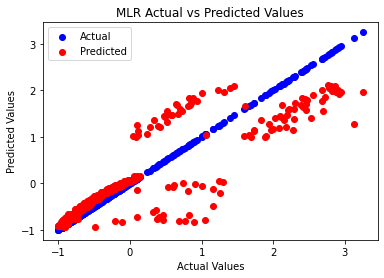

In [7]:
# Plotting the actual values as scatter plot
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Plotting the predicted values as scatter plot
plt.scatter(y_test, y_pred, color='red', label='Predicted')

# Adding labels to the plot
plt.title('MLR Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()

In [8]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

y_pred_svr = svr.predict(x_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print('Root Mean Squared Error:', rmse_svr)

r2_svr = svr.score(x_test, y_test)
print('R^2 Value:', r2_svr)

adj_r2_svr = 1 - ((1 - r2_svr) * (n - 1) / (n - k - 1))
print("Adjusted R-squared:", adj_r2_svr)

Root Mean Squared Error: 0.5162824660829682
R^2 Value: 0.7550589358929616
Adjusted R-squared: 0.7519662456895899


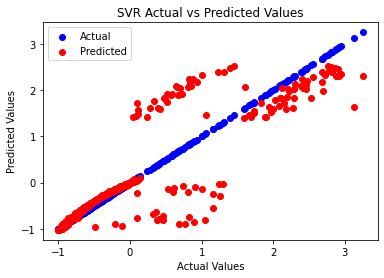

In [9]:
# Plotting the actual values as scatter plot
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Plotting the predicted values as scatter plot
plt.scatter(y_test, y_pred_svr, color='red', label='Predicted')

# Adding labels to the plot
plt.title('SVR Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', rmse_rf)

r2_rf = rf.score(x_test, y_test)
print('R^2 Value:', r2_rf)

adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - k - 1))
print("Adjusted R-squared:", adj_r2_rf)

Root Mean Squared Error: 0.5533883117122237
R^2 Value: 0.7185852785682694
Adjusted R-squared: 0.7150320623885758


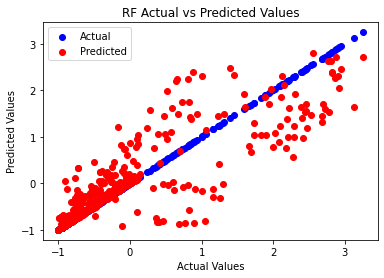

In [11]:
# Plotting the actual values as scatter plot
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Plotting the predicted values as scatter plot
plt.scatter(y_test, y_pred_rf, color='red', label='Predicted')

# Adding labels to the plot
plt.title('RF Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()

In [12]:
import xgboost as xgb

regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

regressor.fit(x_train, y_train)

y_pred_xgb = regressor.predict(x_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print('Root Mean Squared Error:', rmse_xgb)

r2_xgb = regressor.score(x_test, y_test)
print('R^2 Value:', r2_xgb)

adj_r2_xgb = 1 - ((1 - r2_xgb) * (n - 1) / (n - k - 1))
print("Adjusted R-squared:", adj_r2_xgb)

Root Mean Squared Error: 0.525241334989732
R^2 Value: 0.7464844275113911
Adjusted R-squared: 0.7432834733133027


C:\Users\SCSM11\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\SCSM11\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


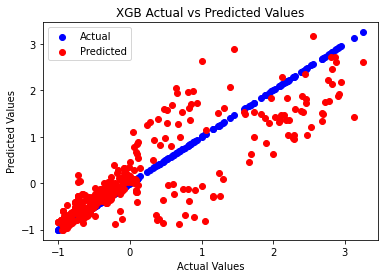

In [13]:
# Plotting the actual values as scatter plot
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Plotting the predicted values as scatter plot
plt.scatter(y_test, y_pred_xgb, color='red', label='Predicted')

# Adding labels to the plot
plt.title('XGB Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

sgb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
sgb.fit(x_train,y_train)

y_pred_sgb = sgb.predict(x_test)

rmse_sgb = np.sqrt(mean_squared_error(y_test, y_pred_sgb))
print('Root Mean Squared Error:', rmse_sgb)

r2_sgb = sgb.score(x_test, y_test)
print('R^2 Value:', r2_sgb)

adj_r2_sgb = 1 - ((1 - r2_sgb) * (n - 1) / (n - k - 1))
print("Adjusted R-squared:", adj_r2_sgb)

Root Mean Squared Error: 0.5139116942951857
R^2 Value: 0.7573033122382937
Adjusted R-squared: 0.7542389601200904


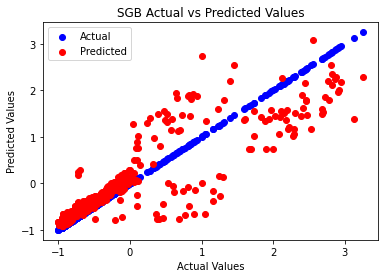

In [15]:
# Plotting the actual values as scatter plot
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Plotting the predicted values as scatter plot
plt.scatter(y_test, y_pred_sgb, color='red', label='Predicted')

# Adding labels to the plot
plt.title('SGB Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()